In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [120]:
data = pd.read_csv('travel_insurance.csv')

In [121]:
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

* 1 indicates those who have traveling insurace while 0 indicates does who don't have
* Travel Habit in customers and non Customers.
* Does Employment type influence having a traveling insurance?
* Is there a corrolation between passengers income and travel Insurance? 
* Ever traveled Abroad.?
* Passengers with travel insurance.
* Who are those that most likely to pay for their traveling insurance? 


# EXPLORATORY DATA ANALYSIS

* Travel Habit in Customers and Non Customers

In [92]:
#Those who travel abroad are less than those who do 
data['EverTravelledAbroad'].value_counts()

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

In [100]:
#Those who are frequent flyers are less than those who do 
data['FrequentFlyer'].value_counts()

No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

In [140]:
#changing data type to get infomation in the Travel Insurance column
data['TravelInsurance'] = data['TravelInsurance'].astype(str)

* Non Frequent flyers with no travel insurance are 471 people 
* Frequent flyers with travel insurance are 239 people

In [10]:
#Non Frequent flyers with no travel insurance are 471 
#Frequent flyers with travel insurance are 239
data.groupby('FrequentFlyer')['TravelInsurance'].sum()

FrequentFlyer
No     471
Yes    239
Name: TravelInsurance, dtype: int64

* Non Abraod Travelers with no travel insurance are 412 people
* Abroad Travelers with travel insurance are 298 people

In [11]:
#Non Abraod Travelers with no travel insurance are 412 
#Abroad Travelers with travel insurance are 298
data.groupby('EverTravelledAbroad')['TravelInsurance'].sum()

EverTravelledAbroad
No     412
Yes    298
Name: TravelInsurance, dtype: int64

In [123]:
#Create a dummy dataset
dummy= pd.get_dummies(data['FrequentFlyer'])

In [124]:
dummy.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [125]:
df2=pd.concat((data, dummy), axis=1)

In [126]:
df=df2.drop(['No'],axis=1, inplace=True)

In [127]:
data=df2.rename(columns={'Yes':'Frequent_Flyer_binary'})

In [20]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [23]:
#changing data type to get infomation in the frequent flyer column
data['Frequent_Flyer_binary'] = data['Frequent_Flyer_binary'].astype(str)

In [136]:
#People with traveling insurance are less than those who have  
data['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

* Does Employment type influence Frequent Flying?

* The  count difference between those who work in the private sector and those who work in the public sector is really large so it wiil be 'somewhat' bias to say based on job category one frquently fly's than the other

In [148]:
data['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [151]:
#Does Employment type influnce Frequent Flying?
#Again the large number differnce between the two job categories should be considered 
df=data.pivot_table(index='Employment Type', columns='FrequentFlyer', aggfunc='size')
df.style.background_gradient('Greens')

FrequentFlyer,No,Yes
Employment Type,,
Government Sector,503,67
Private Sector/Self Employed,1067,350


* Does Employment type influence traveling insurance?
* Employement type does influence to an extent because even though in the dataset one job category is larger than the other we could see that it is 570 to 847 have their insuranc. Unlike the Government workers were it is 140 to 430

In [132]:
# Does Employment type influnce traveling insurance 
df=data.pivot_table(index='Employment_Type', columns='TravelInsurance', aggfunc='size')
df.style.background_gradient('Greens')

TravelInsurance,0,1
Employment_Type,,
Government Sector,430,140
Private Sector/Self Employed,847,570


* Is there a corrolation between passengers income and travel Insurance 
* The Corrolation between Customers anuual income and Travel Insurance is 40%. This is low. However the 40% of people largly come from the private sector


In [129]:
#The Corrolation between Customers anuual income and Travel Insurance is 40%. This is low
#This is low. However the 40% of people largly come from the private sector
data.corr()['AnnualIncome'].sort_values(ascending=False)

AnnualIncome             1.000000
TravelInsurance          0.396763
Frequent_Flyer_binary    0.353087
ChronicDiseases         -0.001149
FamilyMembers           -0.015367
Age                     -0.020101
Name: AnnualIncome, dtype: float64

* Who are those that most likely to pay for their traveling insurance?
* it seems those within the private/self employed sector earn more and are able to pay for their insurance
* There are more Private workers than public workers in the company's data. Thats why it may look as if more money will come from those in the private sectore

In [145]:
#There are more Private workers than public workers in the company's data. Thats why in the it looks as if more money will cone from those from the private sectore
data.groupby('Employment Type')['AnnualIncome'].sum()

Employment Type
Government Sector                413450000
Private Sector/Self Employed    1439950000
Name: AnnualIncome, dtype: int64

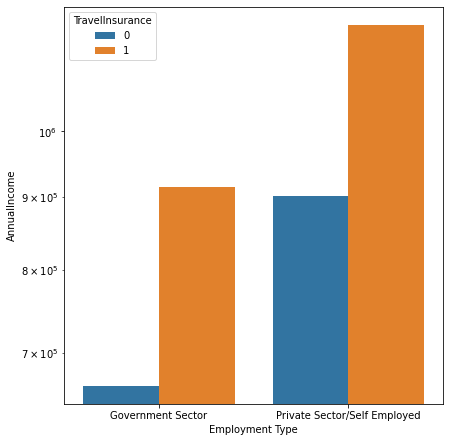

In [55]:
#Who are those that most likely to pay for their traveling insurance?
#it seems those within the private/self employed sector payed for their insurance than those in the public sector
plt.figure(figsize = (6.8,7.3))
sns.barplot(x='Employment Type', y='AnnualIncome', hue='TravelInsurance', data=data,ci=None, log=True)
plt.show()

* Does Annual income influnce Frequent Flying?
* Again the large number differnce between the two job categories should be considered 

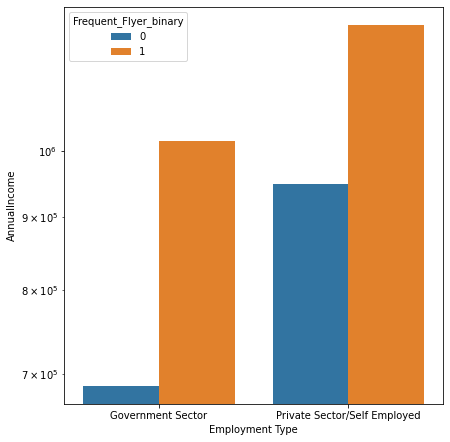

In [21]:
#Does Annual income influnce Frequent Flying?
#Again the large number differnce between the two job categories should be considered 
plt.figure(figsize = (6.8,7.3))
sns.barplot(x='Employment Type', y='AnnualIncome', hue='Frequent_Flyer_binary', data=data,ci=None, log=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

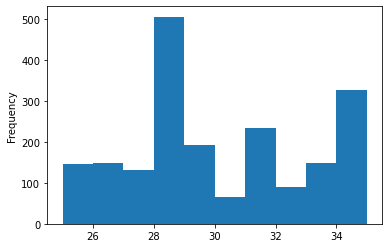

In [134]:
data['Age'].plot(kind='hist')

# Filter the DataFrame

In [162]:
#Frequent flyers who have travel insurance 
data[(data.FrequentFlyer== 'Yes' ) & (data.TravelInsurance== '1')].head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Frequent_Flyer_binary
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1,1
11,26,Private Sector/Self Employed,Yes,1400000,5,0,Yes,Yes,1,1
13,31,Government Sector,Yes,1500000,6,0,Yes,Yes,1,1
19,34,Private Sector/Self Employed,Yes,1500000,2,0,Yes,Yes,1,1


In [163]:
#Frequent flyers who don't have travel insurance
data[(data.FrequentFlyer== 'Yes' ) & (data.TravelInsurance== '0')].head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Frequent_Flyer_binary
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0,1
20,28,Private Sector/Self Employed,Yes,1150000,6,0,Yes,No,0,1
24,31,Government Sector,Yes,1500000,7,0,Yes,Yes,0,1
27,28,Private Sector/Self Employed,Yes,1250000,2,0,Yes,No,0,1


In [165]:
#non Frequent flyers who have travel insurance
data[(data.FrequentFlyer== 'No' ) & (data.TravelInsurance== '1')].head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Frequent_Flyer_binary
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,0
12,32,Government Sector,Yes,850000,6,0,No,No,1,0
17,28,Private Sector/Self Employed,Yes,800000,7,0,No,No,1,0
18,29,Private Sector/Self Employed,Yes,1050000,5,1,No,No,1,0
21,29,Private Sector/Self Employed,Yes,350000,3,0,No,No,1,0


In [166]:
#non Frequent flyers who do not have travel insurance
data[(data.FrequentFlyer== 'No' ) & (data.TravelInsurance== '0')].head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Frequent_Flyer_binary
0,31,Government Sector,Yes,400000,6,1,No,No,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0,0


In [174]:
#Frequent flyers dataframe
FrequentFlyer=data[(data.FrequentFlyer== 'Yes')]

In [175]:
frq.shape

(417, 10)

In [176]:
#nonFrequent flyers dataframe
nonFrequentFlyer=data[(data.FrequentFlyer== 'No')]

In [177]:
nonFrequentFlyer.shape

(1570, 10)

In [194]:
#People with Travel Insurance
insurance_holders=data[(data.TravelInsurance== '1')]

In [196]:
insurance_holders.shape

(710, 10)

In [197]:
#People with Travel Insurance
noninsurance_holders=data[(data.TravelInsurance== '0')]

In [198]:
noninsurance_holders.shape

(1277, 10)

In [191]:
#FrequentFlyer.groupby('AnnualIncome')['FrequentFlyer'].sum()
#FrequentFlyer.groupby('AnnualIncome')['FrequentFlyer'].value_counts()
df=FrequentFlyer.pivot_table(index='AnnualIncome', columns='FrequentFlyer', aggfunc='size')
df.style.background_gradient('Greens')

FrequentFlyer,Yes
AnnualIncome,
500000,1
550000,14
600000,22
650000,6
700000,18
750000,13
800000,24
850000,11
900000,19


In [193]:
df_1=nonFrequentFlyer.pivot_table(index='AnnualIncome', columns='FrequentFlyer', aggfunc='size')
df_1.style.background_gradient('Greens')

FrequentFlyer,No
AnnualIncome,
300000,88
350000,55
400000,65
450000,15
500000,142
550000,67
600000,76
650000,24
700000,77


In [199]:
#for insurance holders
df_5=insurance_holders.pivot_table(index='AnnualIncome', columns='TravelInsurance', aggfunc='size')
df_5.style.background_gradient('Greens')

TravelInsurance,1
AnnualIncome,
300000,6
350000,4
400000,10
450000,5
500000,35
550000,23
600000,19
650000,11
700000,30


In [200]:
df_6=noninsurance_holders.pivot_table(index='AnnualIncome', columns='TravelInsurance', aggfunc='size')
df_6.style.background_gradient('Greens')

TravelInsurance,0
AnnualIncome,
300000,82
350000,51
400000,55
450000,10
500000,108
550000,58
600000,79
650000,19
700000,65


In [277]:
X = data[['Age','AnnualIncome']]

In [278]:
y= data['Frequent_Flyer_binary'].values

In [279]:
X

,Age,AnnualIncome
0,31,400000
1,31,1250000
2,34,500000
3,28,700000
4,28,700000
...,...,...
1982,33,1500000
1983,28,1750000
1984,28,1150000
1985,34,1000000


In [280]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics 
 

In [283]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=.3)

Text(0, 0.5, 'Accuracy')

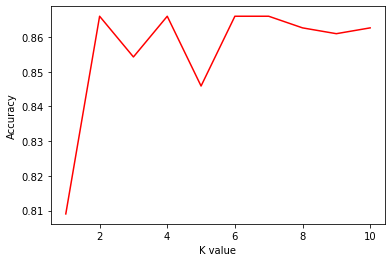

In [284]:
accuracy= []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
#plt.style.use('fivethirtyeight')
plt.plot(range(1,11), accuracy, c ='r')
plt.xlabel('K value')
plt.ylabel('Accuracy')


In [285]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8659966499162479

In [289]:
from mlxtend.plotting import plot_decision_regions
X = data[['Age','AnnualIncome']].to_numpy() 
y= data['Frequent_Flyer_binary'].to_numpy()

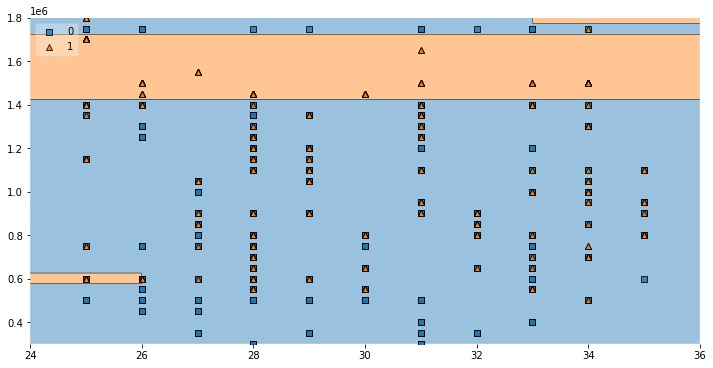

In [290]:
#plt.style.use('bmh')
plt.figure(figsize=(12,6))
plot_decision_regions(X, y , clf =knn, legend=2)
plt.show()